In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
dataset2 = pd.read_csv(r"C:\Users\DELL\Desktop\weather result\model_2\model2.csv")
dataset2.head(3)

,Model,Type,Train/Test,R²,MSE,MAE,RMSE,Max Error,RSE,RAE,Huber Loss,Adjusted R²
0,Bagging,Linear MLP,Train,76.370326,20.212522,34.745995,4.495834,2.578716,23.629674,46.244761,9.888884,-22.630168
1,Bagging,Linear MLP,Test,76.626449,19.971776,34.601035,4.468979,2.460690,23.373551,46.064542,9.790528,-22.375019
2,Boosting,Linear MLP,Train,83.706324,13.937403,28.055590,3.733283,2.470005,16.293676,37.340248,6.839226,-15.294017


In [7]:
# Separate metrics
metrics2 = ['R²', 'MAE', 'MSE', 'RMSE', 'Max Error', 'Huber Loss', 'RSE', 'RAE'] # 'Adj R²',
types2 = ['Bagging train', 'Bagging test', 'Boosting train', 'Boosting test', 'Stacking train', 'Stacking train', 'Voting train', 'Voting test']

In [8]:
train_values = dataset2[dataset2['Train/Test'] == 'Train'][metrics2].values
test_values = dataset2[dataset2['Train/Test'] == 'Test'][metrics2].values

In [9]:
models = ['Linear MLP', 'Linear KNeighbors', 'Linear DecisionTree', 'Linear RandomForest', 'MLP KNeighbors', 'MLP DecisionTree', 'MLP RandomForest', 'KNeighbors DecisionTree', 'KNeighbors RandomForest', 'DecisionTree RandomForest']

In [10]:
# Define the colors for the bars
# colors = ['red', 'red', 'blue', 'blue', 'orange', 'orange', 'violet', 'violet']
colors = ['#007FFF', '#007FFF', 'orange', 'orange', '#97C298', '#97C298', 'violet', 'violet']

In [15]:
# X-axis positions
x = np.arange(len(metrics2))  
width = 0.09 
bar_gap = 0.015

***one model graph***

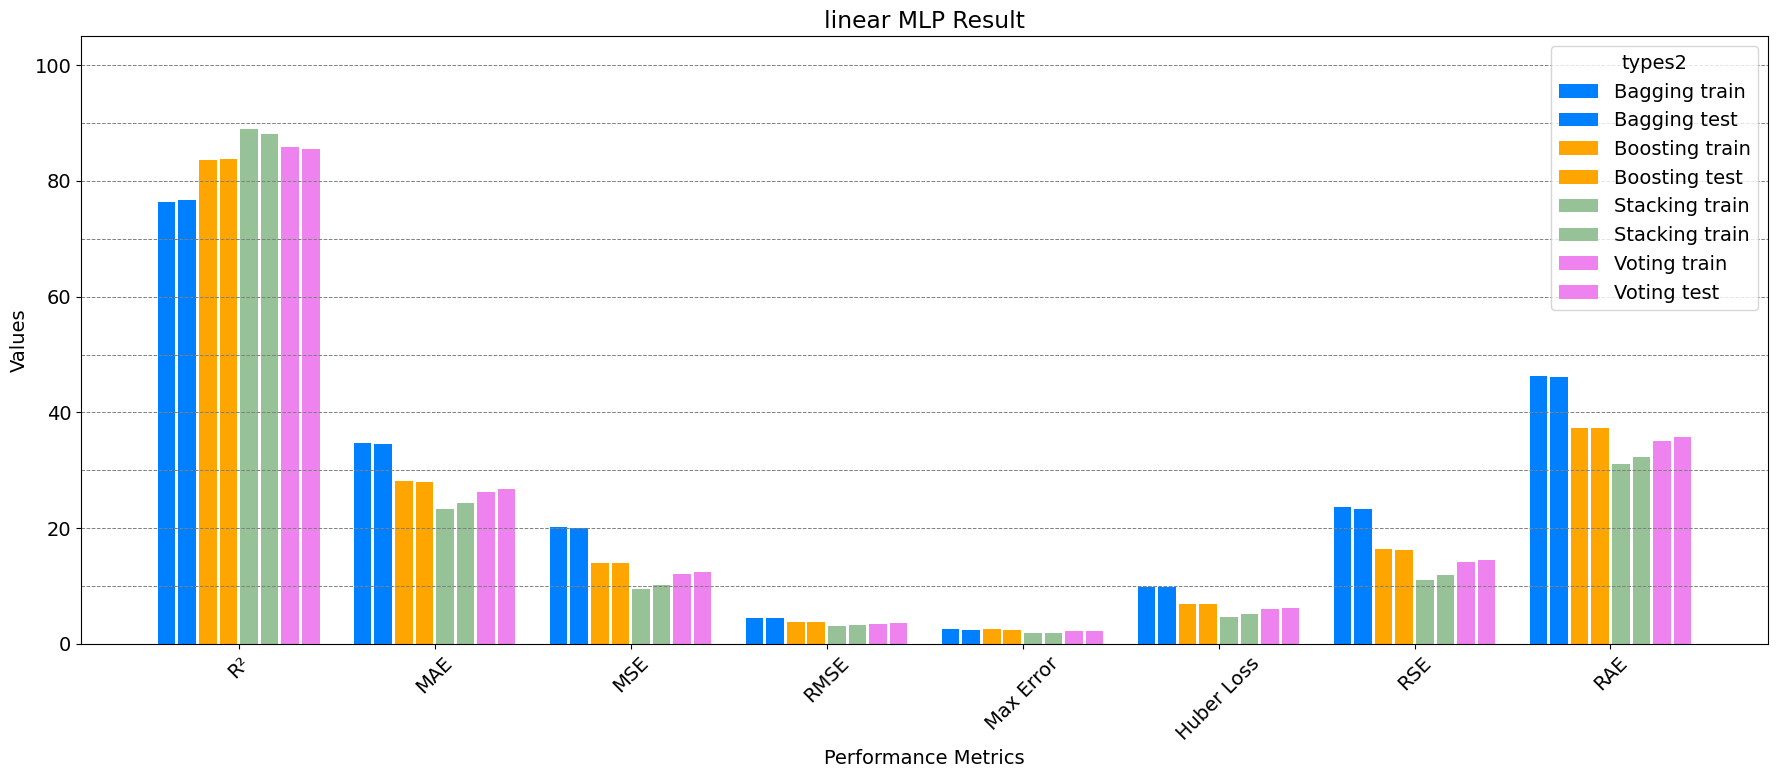

In [16]:
model_data1 = dataset2[(dataset2['Train/Test'].isin(['Train', 'Test'])) & (dataset2['Type'] == 'Linear MLP')][metrics2].values

fig, (ax3) = plt.subplots(1, figsize=(18, 8), sharey=True)

    # Plotting Training Data for the current model
for i, model in enumerate(types2):
    ax3.bar(x + i * (width + bar_gap), model_data1[i], width, label=types2[i], color=colors[i])

# Adding labels, titles, and ticks
ax3.set_xlabel('Performance Metrics')
ax3.set_ylabel('Values')
ax3.set_title(f'linear MLP Result')  # Dynamic title based on the current model
ax3.set_xticks(x + (width + bar_gap) * (len(types2) - 1) / 2)
ax3.set_xticklabels(metrics2, rotation=45)

# Adding horizontal lines for each 10 units
for y in range(0, int(max(train_values.max(), test_values.max())) + 10, 10):
    ax3.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

ax3.legend(title='types2', loc='upper right')

# Adding some padding and layout adjustments
fig.tight_layout()

# Show the plot for the current model
plt.show()

***loop of model***

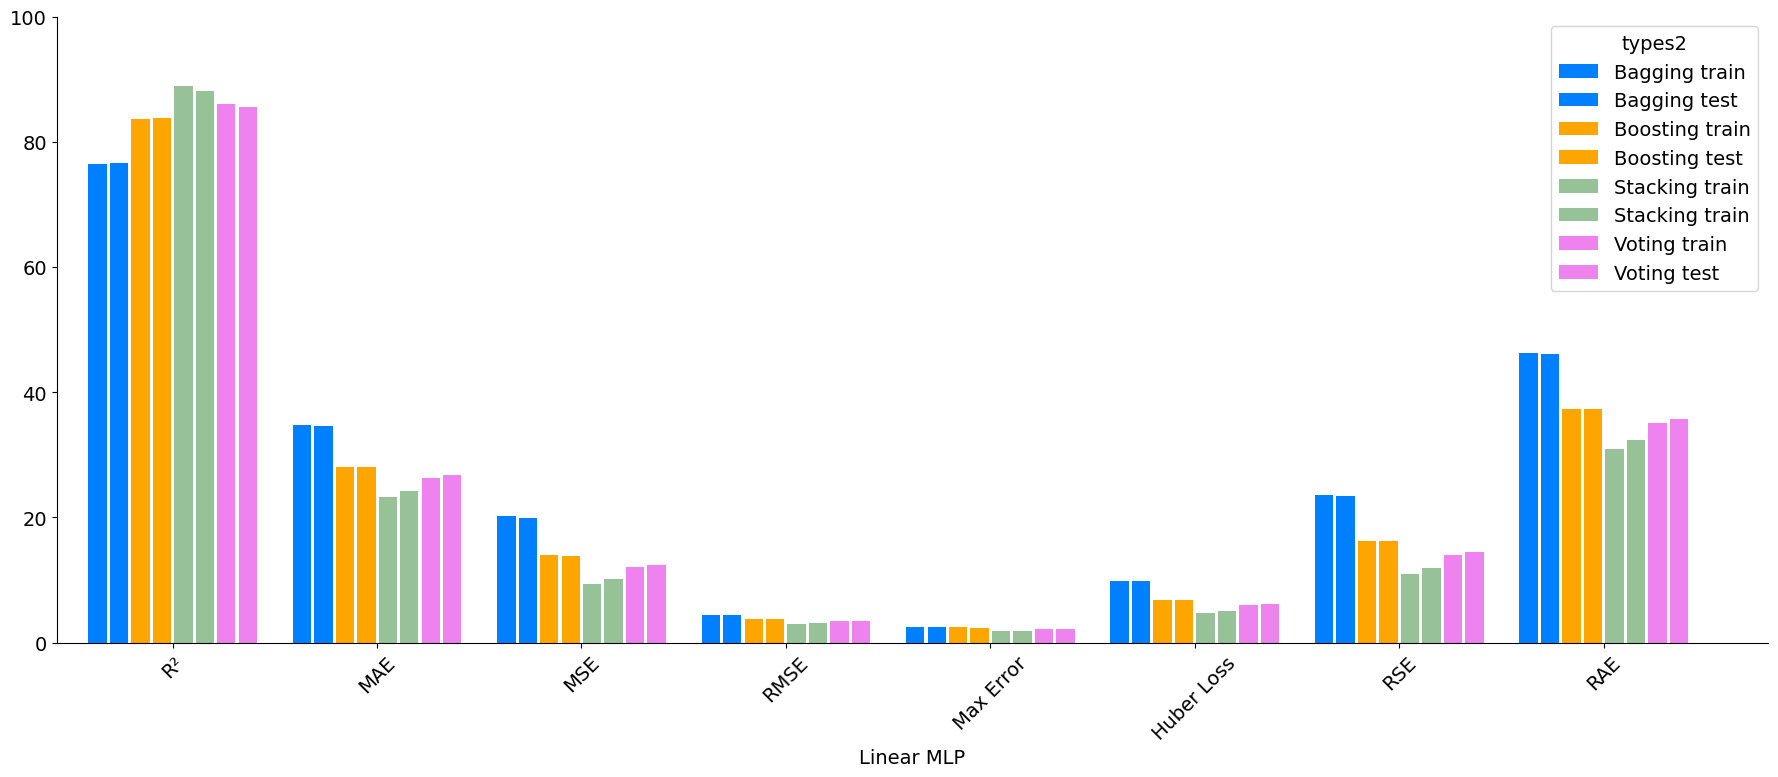

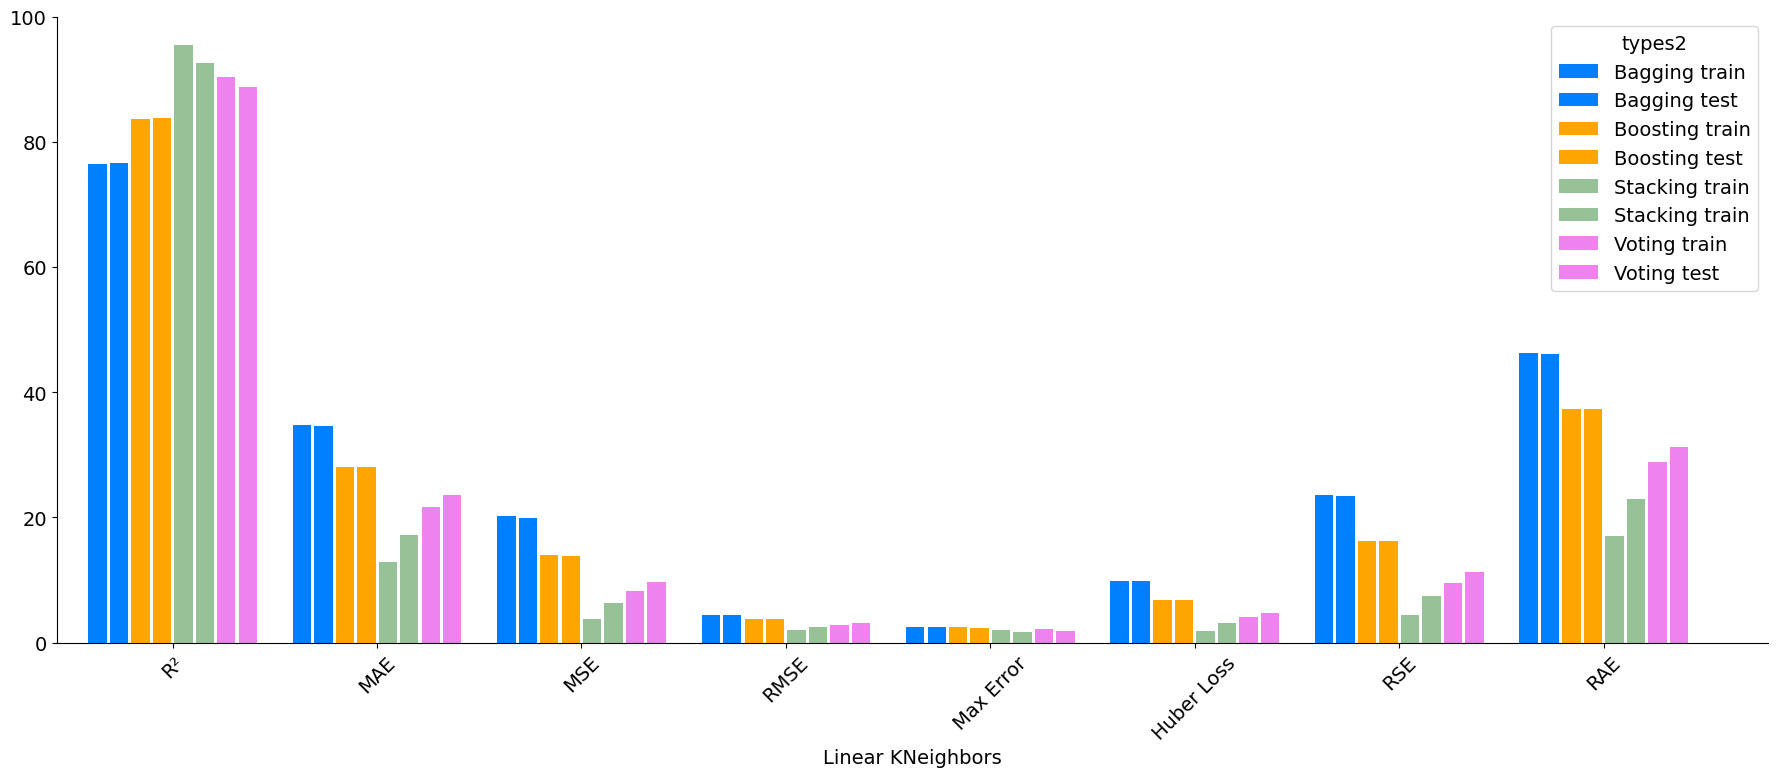

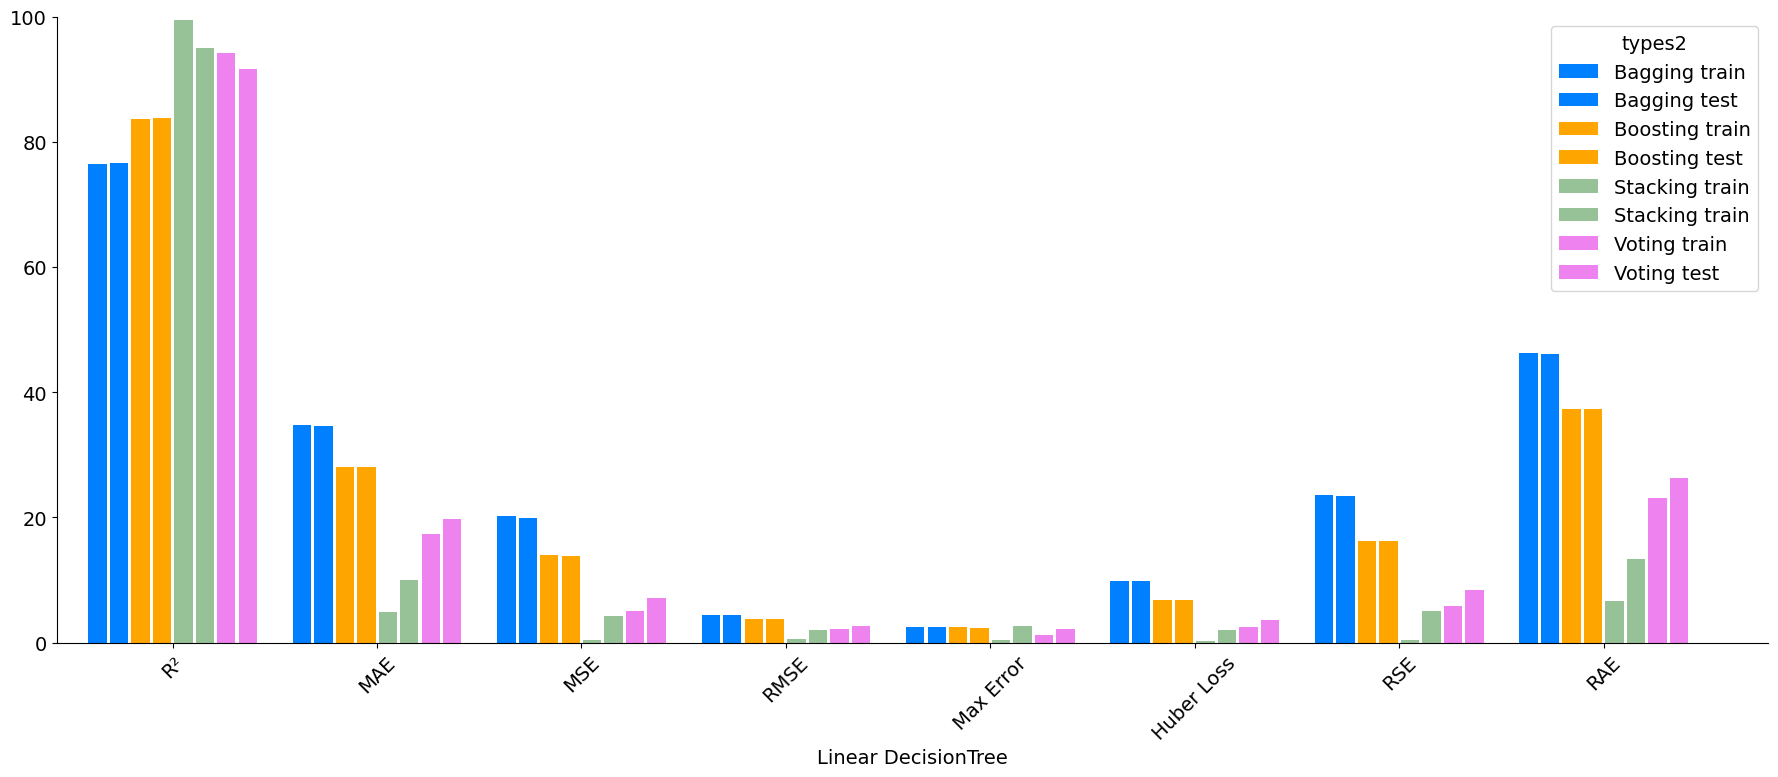

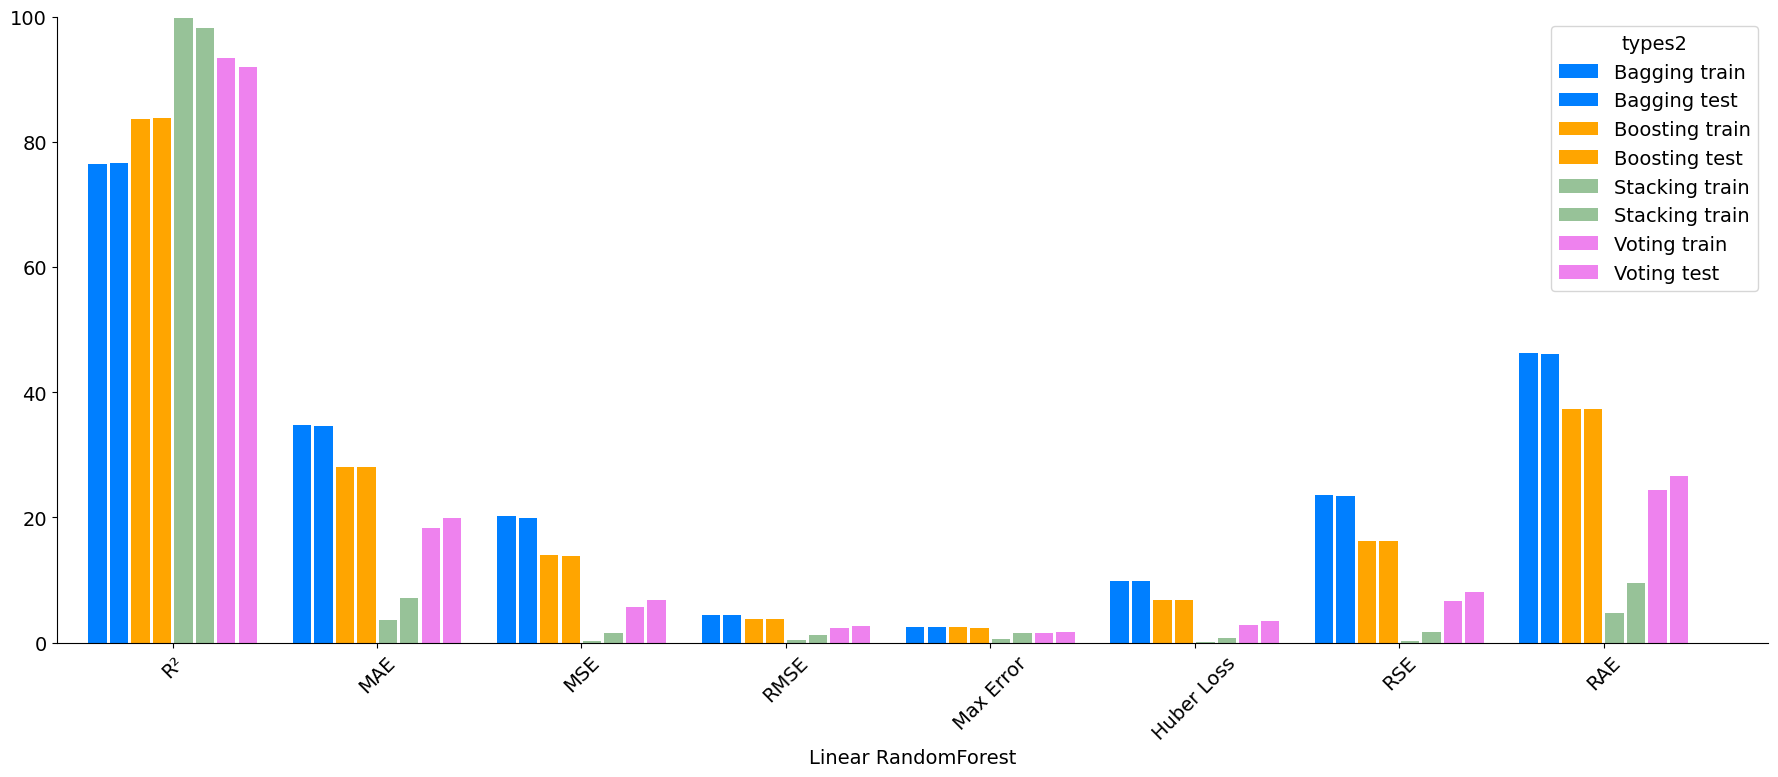

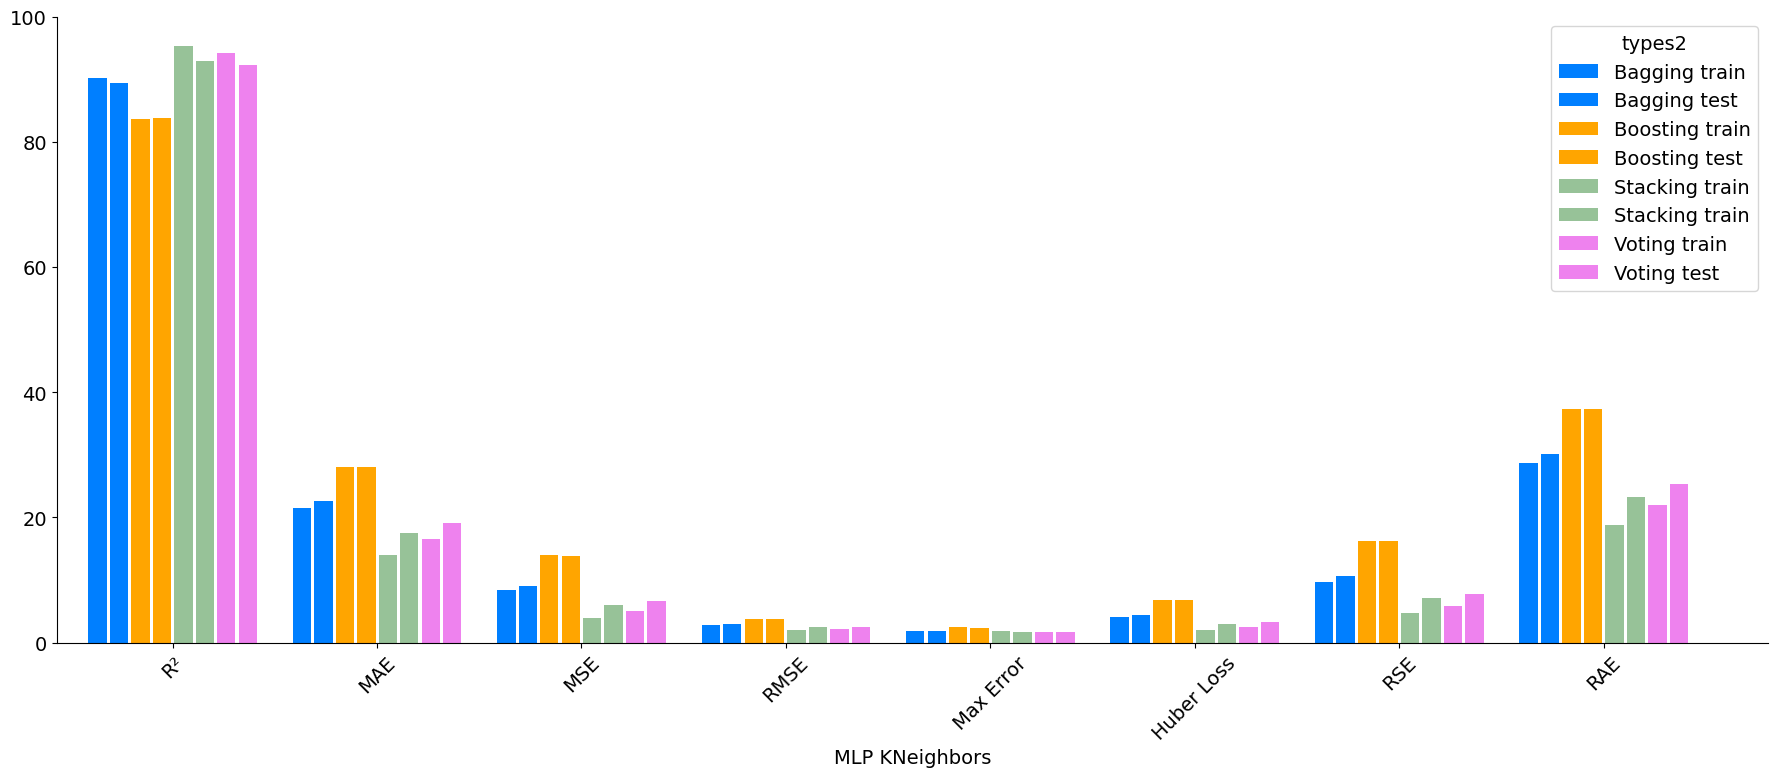

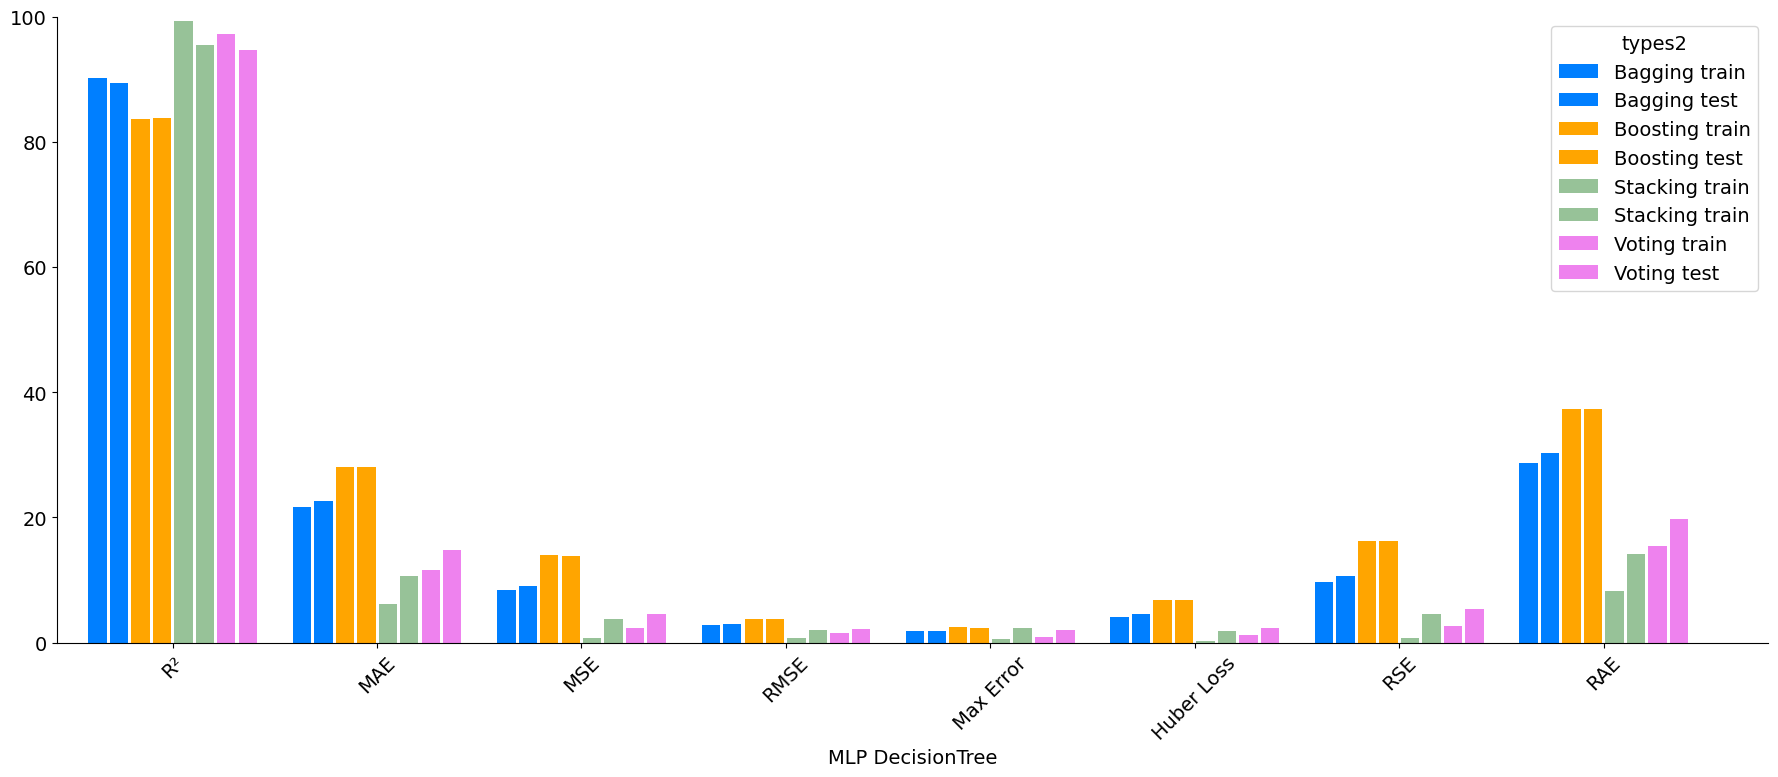

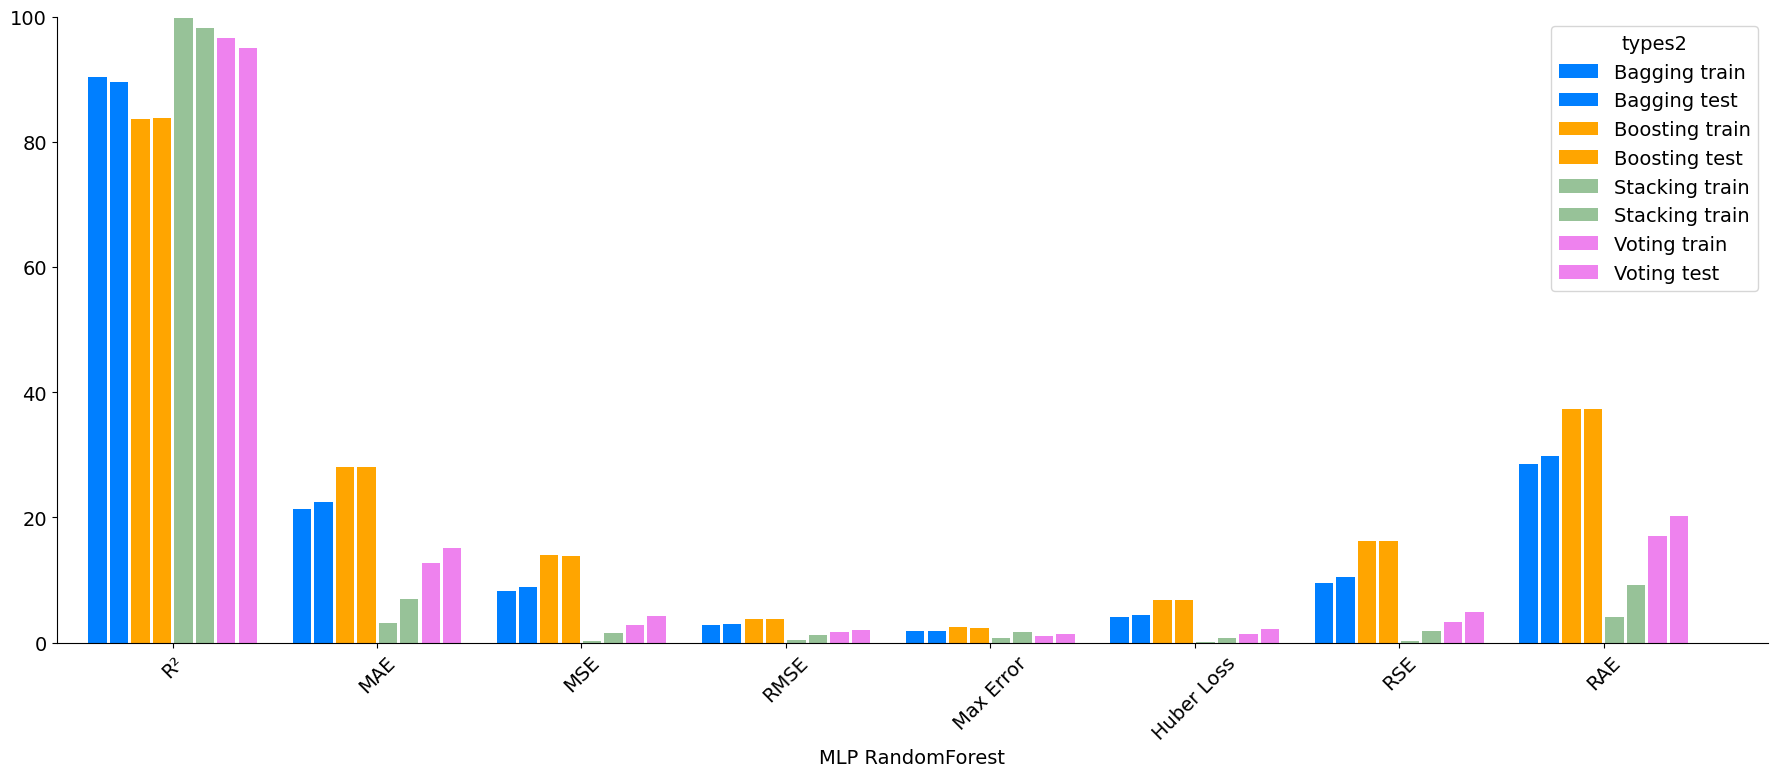

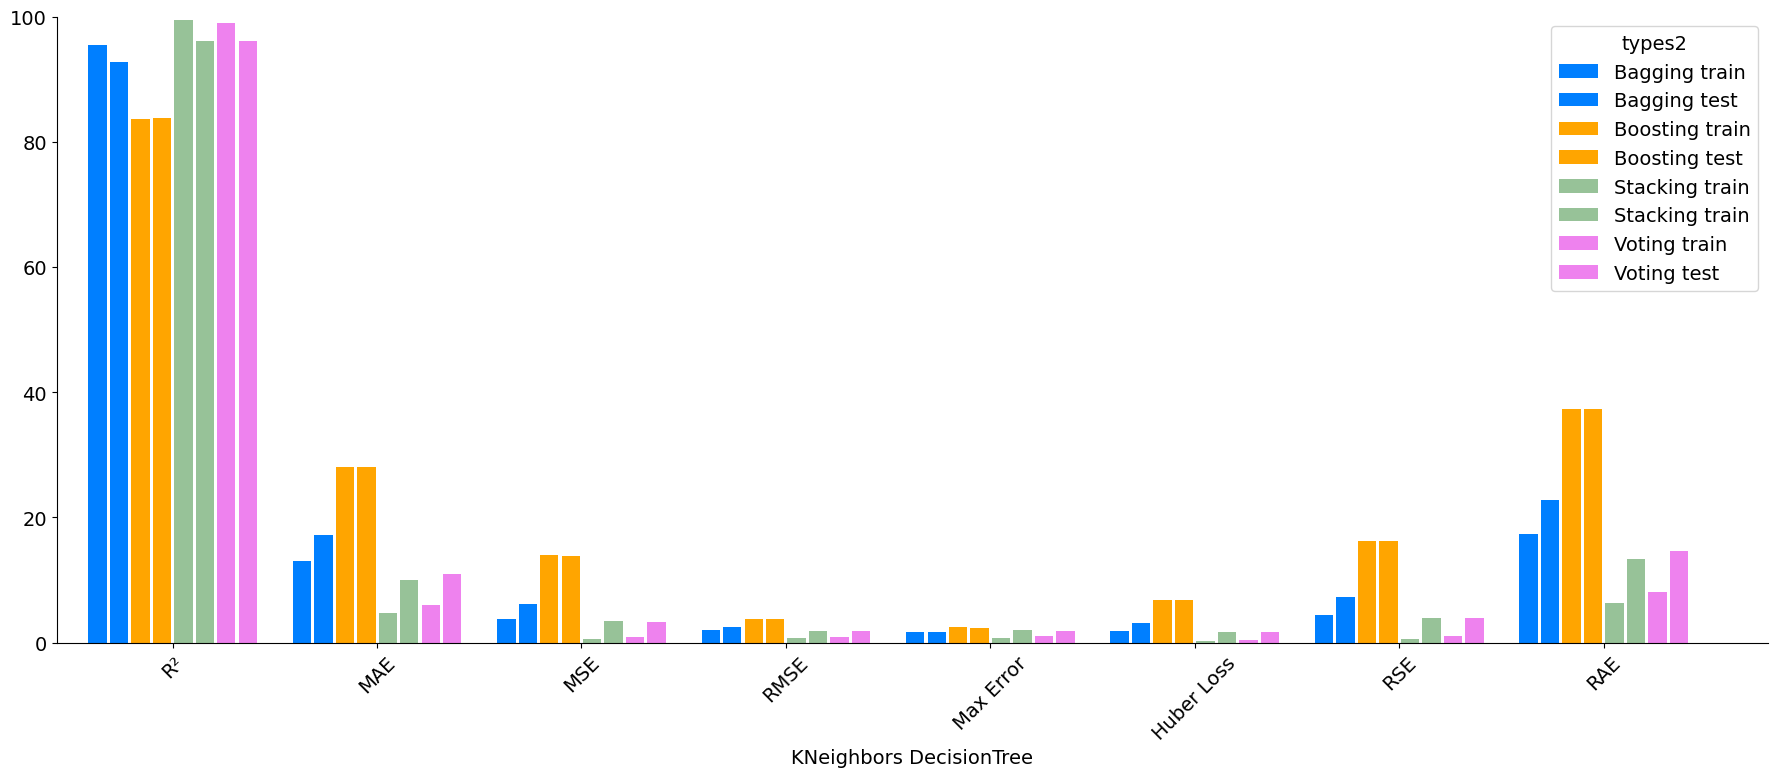

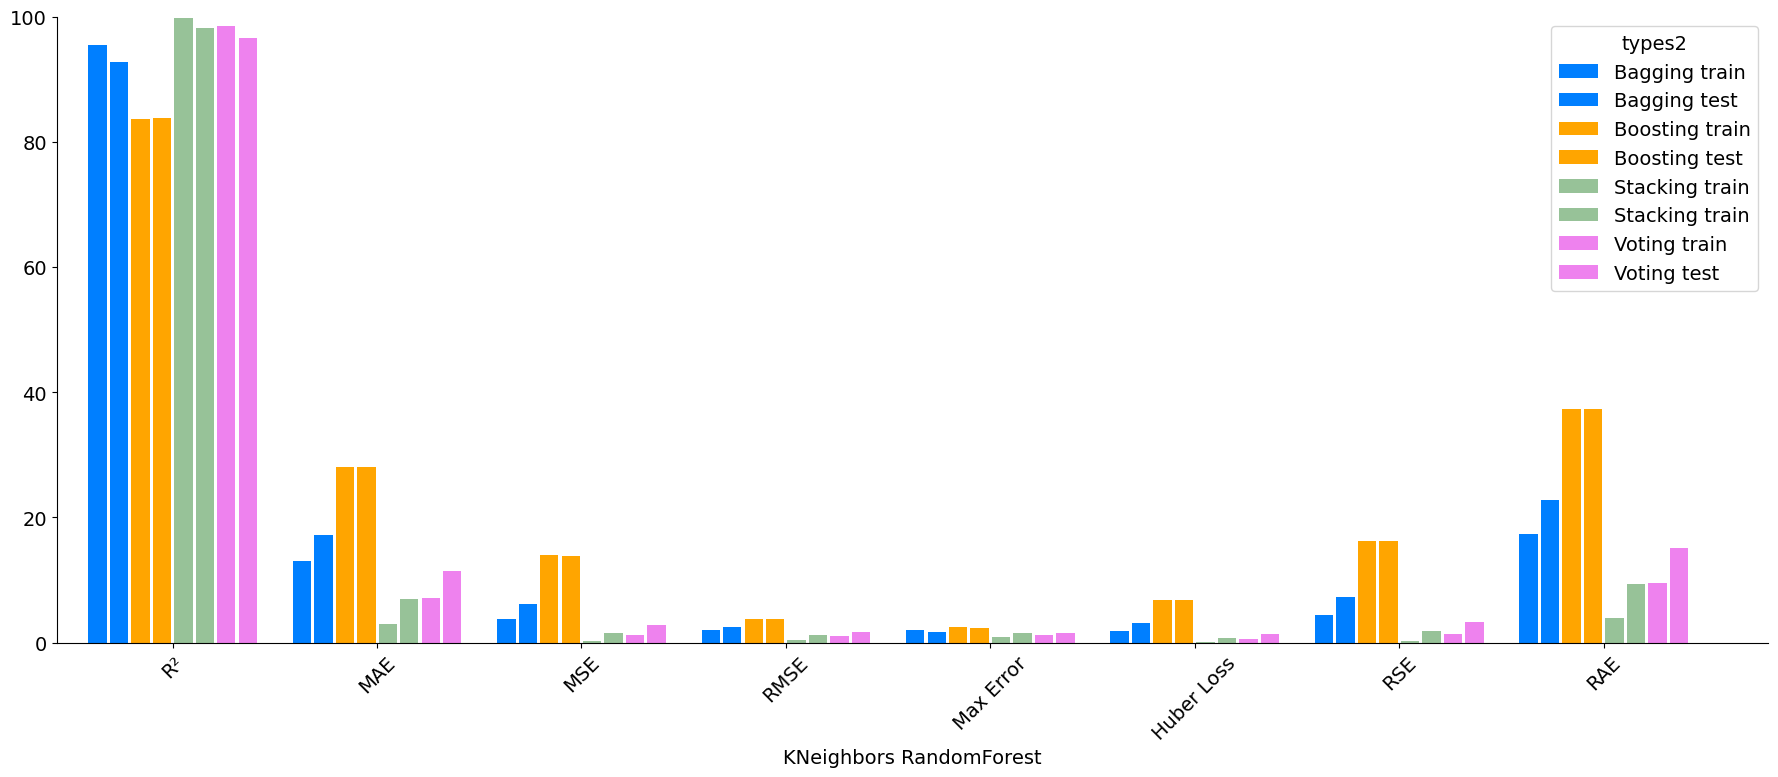

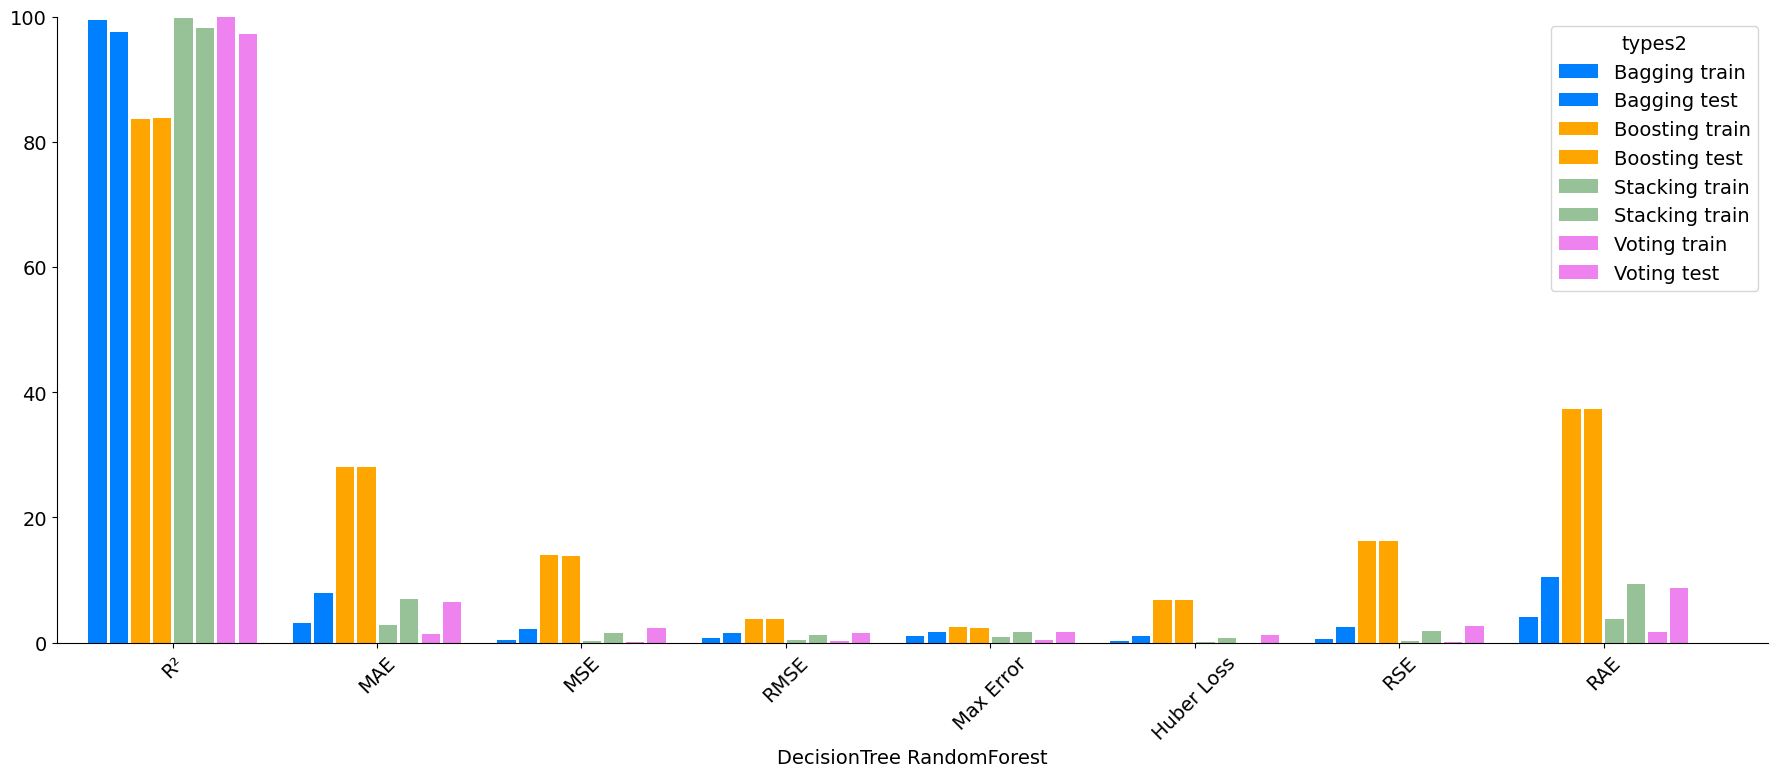

In [18]:

titles = models

# Loop through each model type
for model_type, title in zip(models, titles):
    # Filter dataset based on the current model type
    model_data = dataset2[(dataset2['Train/Test'].isin(['Train', 'Test'])) & (dataset2['Type'] == model_type)][metrics2].values
    
    plt.rcParams.update({'font.size': 14, 'text.color': 'black', 'axes.labelcolor': 'black', 'xtick.color': 'black', 'ytick.color': 'black'})

    # Create subplots
    fig, (ax3) = plt.subplots(1, figsize=(18, 8), sharey=True)

    # Plotting Training Data for the current model
    for i, model in enumerate(types2):
        ax3.bar(x + i * (width + bar_gap), model_data[i], width, label=types2[i], color=colors[i])

    # Adding labels, titles, and ticks
    ax3.set_xlabel(title)
    # ax3.set_ylabel('Values')
    # ax3.set_title(title)  # Dynamic title based on the current model
    ax3.set_xticks(x + (width + bar_gap) * (len(types2) - 1) / 2)
    ax3.set_xticklabels(metrics2, rotation=45)

    # Adding horizontal lines for each 10 units
    # for y in range(0, int(max(train_values.max(), test_values.max())) + 10, 10):
    #     ax3.axhline(y=y, color='gray', linestyle='--', linewidth=0.7)

    ax3.legend(title='types2', loc='upper right')
    
    ax3.set_ylim(top=100)
    
    ax3.set_xlim(left=-0.2,)  # Set left limit of x-axis to 0

    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    # ax3.spines['bottom'].set_visible(False)
    # ax3.spines['left'].set_visible(False)

    # Adding some padding and layout adjustments
    fig.tight_layout()

    # Show the plot for the current model
    plt.show()

